In [1]:
from fastai2.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=Pipeline([attrgetter("name"), RegexLabeller(pat = r'^(.*)_\d+.jpg$')]),
                 item_tfms=Resize(128),
                 batch_tfms=aug_transforms())

In [4]:
pets.type_tfms[1][0].loss_func

FlattenedLoss of CrossEntropyLoss()

In [5]:
dls = pets.dataloaders(path/"images")

In [6]:
dls.train.loss_func

FlattenedLoss of CrossEntropyLoss()

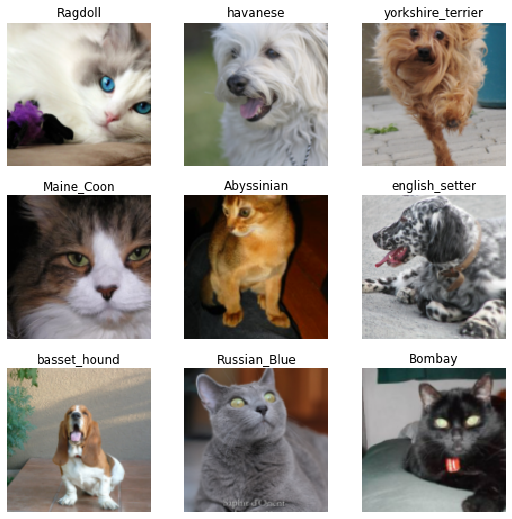

In [7]:
dls.show_batch()

## Learner

In [8]:
model = create_cnn_model(resnet34, 37, cut=-2)

In [9]:
resnet34()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [10]:
model_sizes(model[0])

[torch.Size([1, 64, 32, 32]),
 torch.Size([1, 64, 32, 32]),
 torch.Size([1, 64, 32, 32]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 64, 16, 16]),
 torch.Size([1, 128, 8, 8]),
 torch.Size([1, 256, 4, 4]),
 torch.Size([1, 512, 2, 2])]

In [11]:
model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

## Learner

In [12]:
learn = Learner(dls, create_cnn_model(resnet34, 37), splitter=model_meta[resnet34]['split'])

1. Begin Fit
2. Begin Epoch 
3. Begin Train 
---
4. Begin Batch
5. After Pred
6. After Loss
7. After Backward 
8. After Step 
9. After Batch
10. `After Train`
---
10. Begin Validate 
11. Begin Batch
12. After Pred 
13. After Loss
14. After Validate
---
15. After Epoch 
16. After Fit

## Train Eval Callback

- learn.train_iter
- pct_train 
- learn.train_iter 
- learn.training 
- model.eval 

## Recorder

In [16]:
L('name').reset()

AttributeError: 'L' object has no attribute 'reset'